# ARIMA(Auto Regressive Integrated Moving Average) 

- seasonal_decompose  :  seasonal 데이터를 트렌드와 주기성 확인

- 추세(Trend ): 데이터가 장기적으로 증가하거나 감소하는 것

- 계절성(Seasonal) : 주, 월, 분기,등 특정 시간의 주기로 나타나는 패턴

- 불규칙요소(Random, Residual) : 예측 불가능한 변동, 추세, 순환, 계절성, 순환 뺸 나머지


분석 순서
1. 안정적 시계열인지 확인
2. 시계열 자료를 안정적인 시계열로 변환
3. ARIMA 모델의 최적화된 파라미터 찾기
4. ARIMA 모델 객체 생성 및 데이터 예측

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import itertools
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [34]:
plt.style.use("ggplot")

In [35]:
path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/sales-of-shampoo.csv'

shampoo = pd.read_csv(path)

In [36]:
shampoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             36 non-null     object 
 1   Sales of shampoo  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


안정적이지 않은 시계열 데이터

In [ ]:
# 1900년대로 보기위해 "Month"에 190 추가
shampoo["Month"] = '190' + shampoo["Month"] 

# Month 타입 변경
shampoo["Month"] = pd.to_datetime(shampoo["Month"])

# 날짜로 인덱스로 설정
shampoo = shampoo.set_index("Month")

In [ ]:
decomposition = seasonal_decompose(shampoo.loc[: "1902-12-01", "Sales of shampoo"])

In [ ]:
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [ ]:
# order(p,d ,q) 
# p(AR) = 1 : 앞에 진짜 1개 사용
# d = 0 : (전찐 -전전찐) 0개 사용
# q(Ma) = 1 : 잔차(에러)의 평균 , (전찐 -전예측)/1
arima = ARIMA(shampoo.loc[: "1902-12-01", "Sales of shampoo"], order = (1, 0, 1))

results = arima.fit()

print(results.summary())

In [ ]:
results.predict()

In [ ]:
# return forecast, fcasterr, conf_int : 첫번째가 예측값
# 위에서 ARIMA 1901년 1월 ~ 1902년 12월까지 데이터 줌
# results.forecast(n) : n개 예측

results.forecast(1)  # 1903년 01월 예측값

results.forecast(12) # 1903년 1월 ~ 12

results.forecast(12)[0]

array([293.13311773, 287.19462545, 281.91358667, 277.21721438,
       273.04077986, 269.32672054, 266.02384661, 263.08663554,
       260.4746046 , 258.15175294, 256.08606537, 254.24907112])

In [ ]:
shampoo.loc["1903-01-01": , "pred"] = results.forecast(12)[0].tolist()

In [ ]:
shampoo

In [ ]:
plt.figure(figsize=(20,10))
shampoo.loc[ : , "Sales of shampoo"].plot(color='b', marker="o")
shampoo.loc["1903-01-01": ,"pred"].plot(color="r", marker="o")

In [ ]:
mean_squared_error(shampoo.loc["1903-01-1" : ,"Sales of shampoo"],shampoo.loc["1903-01-1" : ,"pred"])

58266.73326955454

In [ ]:
p = range(0,5)

d = range(0,5)

q = range(0,5)

order_list = list(itertools.product(p,d, q))

In [ ]:
# 반복문 안에서 에러 발생하면 반복문 종료 -> 예외처리 
# 예외처리  :  try         : for 문 
#              except(제외): 에러나는 곳 제외

for od in order_list:
  try:
    mod = ARIMA(shampoo.loc[ : "1902-12-01", "Sales of shampoo"], order = od)
    print("od = ", od)
    
    results = mod.fit()
    print("aic", results.aic)
    print("="* 100)
  except:
    print("에러")
    print("=" * 100)

In [ ]:
# 
model = ARIMA(shampoo.loc[: "1902-12-01", "Sales of shampoo"], order = (1, 2, 2))
result = model.fit()

print(result.summary())

In [ ]:
forecast = results.forecast(12)[0].tolist()
shampoo.loc["1903-01-01" : ,"pred"] = forecast

In [ ]:
shampoo.tail()

,Sales of shampoo,pred
Month,,
1903-08-01,407.6,469.627615
1903-09-01,682.0,472.217836
1903-10-01,475.3,508.757615
1903-11-01,581.3,556.396622
1903-12-01,646.9,580.293382


In [ ]:
plt.figure(figsize= (20, 10))
shampoo.loc[:, "Sales of shampoo"].plot(color = 'b', marker = 'o')
shampoo.loc["1903-01-01" : , "pred"].plot(color = 'r', marker ='o')

In [ ]:
mean_squared_error(shampoo.loc["1903-01-1" : ,"Sales of shampoo"],shampoo.loc["1903-01-1" : ,"pred"])

6173.955920964344

# 실습 
- 339 ~ 360

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [31]:
plt.style.use("ggplot")

<Figure size 432x288 with 0 Axes>

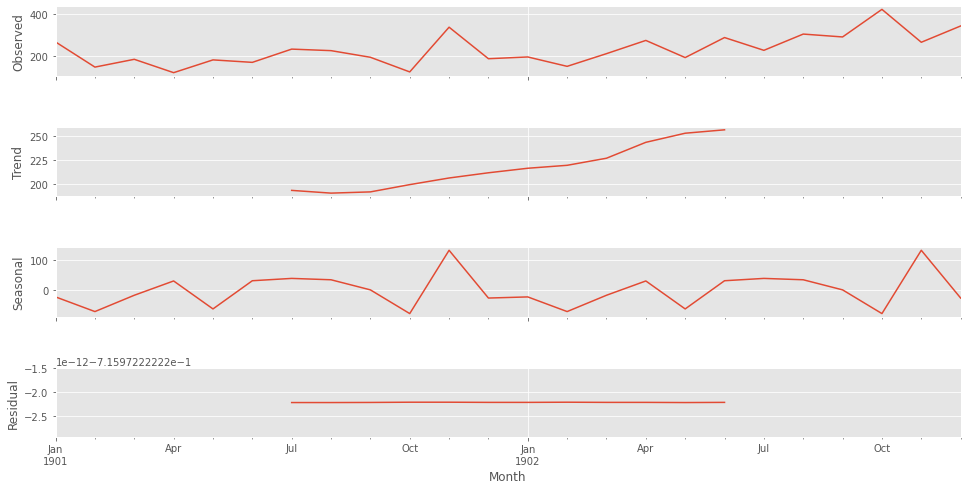

In [32]:
path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/sales-of-shampoo.csv'

shampoo = pd.read_csv(path)

shampoo["Month"] = "190" + shampoo["Month"]

shampoo["Month"] = pd.to_datetime(shampoo["Month"])

shampoo = shampoo.set_index("Month")

# 계절성을 갖는 데이터인지 분석 
decomposition = seasonal_decompose(shampoo.loc[:"1902-12-01", "Sales of shampoo"])

fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15,8)

# 비슷한 주기마다 비슷한 패턴이 보이질 않음 - > 계절성을 갖지 않는 데이터

In [ ]:
# ADF 안전성 테스트
# adfuller 함수의 리턴값중  인덱스[1]은 p-value
# 시계열이 안정적(Stationary)인지 여부를 확인
# p-value > 0.05 -> 안정적이지 않음
result = adfuller(shampoo.loc[: "1902-12-01", 'Sales of shampoo'])

result

In [7]:
p,d,q = range(0,5),range(0,5), range(0,5)

order_list = list(itertools.product(p, d, q))
order_list[:5]

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4)]

In [8]:
# SSE  : SUM( (실제값 - 예측값) **2 ) 
aic_params = []

for order in  order_list:
  try:
    mod = ARIMA(shampoo.loc[ : "1902-12-01", "Sales of shampoo"], order = order)

    results = mod.fit()
    print("ARIMA{} - AIC :{}".format(order, results.aic))
    aic_params.append((results.aic, order ,))
  except:
    pass

ARIMA(4, 0, 0) - AIC :277.90304138417093
ARIMA(4, 0, 1) - AIC :279.8973852955441
ARIMA(4, 0, 2) - AIC :294.3016580481319
ARIMA(4, 1, 0) - AIC :264.9667141646002
ARIMA(4, 1, 1) - AIC :266.8851667869377
ARIMA(4, 1, 2) - AIC :264.6218624568709
ARIMA(4, 2, 0) - AIC :264.6626085950797
ARIMA(4, 2, 1) - AIC :260.1892831029965
ARIMA(4, 2, 2) - AIC :262.86433048157016


In [ ]:
aic_params

In [ ]:
aic_params.sort(reverse = False) 
aic_params[0]

(257.12221051666774, (1, 2, 2))

In [ ]:
model = ARIMA(shampoo.loc[: "1902-12-01", "Sales of shampoo"], order = (1, 2, 2))

results = model.fit()

# results.forecast(12).tolist()

shampoo["pred"] = 0

shampoo.loc["1902-12-31" : ,"pred"] =  results.forecast(12)[0].tolist()

In [ ]:
shampoo

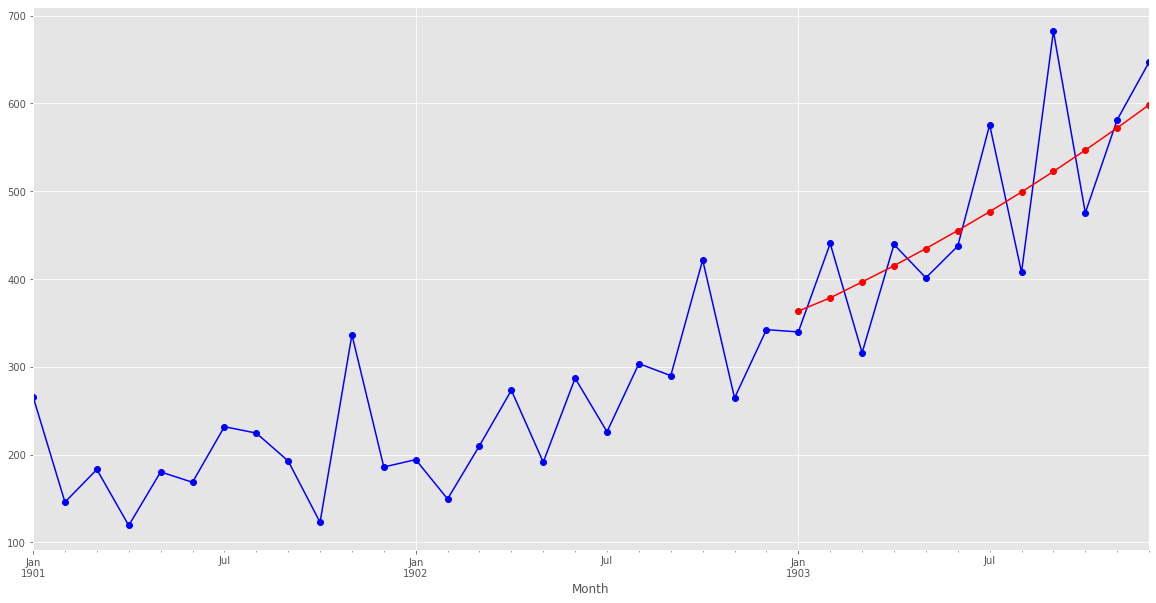

In [ ]:
plt.figure(figsize = (20, 10))
shampoo.loc[: , "Sales of shampoo"].plot(color = 'b', marker = 'o')

shampoo.loc["1903-01-01": , "pred"].plot(color = 'r', marker = 'o')

In [ ]:
# itertools : 반복해야하는 작업을 한번에 해주는 함수!

# range(0,5) :  0이상 5미만까지 숫자를 만들어서 리스트안에 넣기 [0,1,2,3,4]
# range(0,5) = [0,1,2,3,4]

# product(데카르트 곱) :  두 집합으로부터 각각 원소를 하나씩 고른 순서쌍으로 이루어진 집합을 만들어주는 연산

# 그렇다면 
# itertools.product() : 반복작업을 해줄껀데  -> 데카르트 곱으로 반복해주자



order_list = list(itertools.product(p, d, q))


# ---> p,d,q = range(0,5),range(0,5), range(0,5)
#  --->   p = [0,1,2,3,4]  ,d = [0,1,2,3,4] , q =[0,1,2,3,4] 

order_list = list(itertools.product(p, d, q)) 
# 하면  p , d , q 를 가지고 만들 수있는 순서상(데카르트곱 = product)을 반복해서 만들고 
# list 안에 넣어라!  

(0,0,0)
(0,0,1)

# 안정적인 시계열 데이터

- 297

In [123]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import itertools

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/monthly-milk-production-pounds-p.csv'
df = pd.read_csv(path)

df = df.rename(columns = ({"Monthly milk production: pounds per cow. Jan 62 ? Dec 75": "pounds per cow"}))
df = df.drop(168)

df['Month'] = pd.to_datetime(df["Month"])
df = df.set_index("Month")

# 계절성 확인
decomposition = seasonal_decompose(df['pounds per cow'])

fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(20, 10)

In [126]:
result = adfuller(df.loc[:"1974-12-31", 'pounds per cow'])
result[1] # 0.5 보다 커서 안정적이지 않음 

0.6330986048291802

In [ ]:
# 계절성은 갖지만 안정적이지 않은 데이터(Non Stationary)를 안정적인 데이터로 변환(Stationary)
# 앞의 데이터와의 차이를 이용함 (증가치)

df["shift"] = df['pounds per cow'].shift(1)
df['1st diff'] = df['pounds per cow'] - df['pounds per cow'].shift(1)

# null 행삭제후 안정적인지 분석
result = adfuller(df['1st diff'].dropna())

# p-value
print(result[1])

# 시각화
plt.figure(figsize = (20, 10))
df['1st diff'].plot()

In [ ]:
plt.figure(figsize = (20, 10))
df['1st diff'].plot()

In [ ]:
df['2nd diff'] = df['1st diff'] - df['1st diff'].shift(1)

result = adfuller(df['2nd diff'].dropna())

print(result[1])

plt.figure(figsize = (20, 10))

df["2nd diff"].plot()

In [ ]:
# 데이터가 1년주기로 반복되는것으로 보여짐
# 따라서 1년 차이 계산

df['seasonal 1st diff'] = df['1st diff'] - df["1st diff"].shift(12)
result = adfuller(df['seasonal 1st diff'].dropna())
print(result[1])

plt.figure(figsize = (20, 10))
df['seasonal 1st diff'].plot()

In [ ]:
# 계절성을 가지고 비안정적 -> 안정적으로 데이터 변환
model = sm.tsa.statespace.SARIMAX(df.loc[: "1974-12-31",'pounds per cow'],
                                  order = (0,1,0),
                                  seasonal_order = (0, 1, 0, 12)
                                  )

# df.loc[: "1974-12-31",'pounds per cow'] 분석
results = model.fit()

# 결과 조회
print(results.summary())

df['pred'] = 0

df.loc["1975-01-01":,'pred']  = results.forecast(12)

In [ ]:
plt.figure(figsize = (20, 10))

df.loc[:,"pounds per cow"].plot(color = 'b', marker = 'o')

df.loc['1975-01-01' : , "pred"].plot(color = 'r', marker = 'o')

In [ ]:
# AIC 
# 최적의 파라미터 찾기
p, d, q= [range(0,2)]*3

s = range(12, 13)

order_list = list(itertools.product(p,d,q))
sorder_list = list(itertools.product(p,d,q,s))

aic_params = []

for order in order_list:
  
  for sorder in sorder_list:
    try:
      mod = sm.tsa.statespace.SARIMAX(df.loc[:"1974-12-31",'pounds per cow'],
                                      order = order,
                                      seasonal_order = sorder)
      # 데이터 분석
      results = mod.fit()

      print('order : {} sorder : {} - AIC : {}'.format(order, sorder, results.aic))

      aic_params.append((results.aic, order, sorder))
    
    except Exception as e:
      print(e)

In [ ]:
aic_params.sort(reverse = False) 
aic_params

In [135]:
mod = sm.tsa.statespace.SARIMAX(df.loc[:"1974-12-31",'pounds per cow'],
                                      order = (0, 1, 1),
                                      seasonal_order = (0, 1, 1, 12))

results = model.fit()

df['pred'] = 0
df.loc["1975-01-01":, "pred"] = results.forecast(12)

df.tail(15)

,pounds per cow,shift,1st diff,2nd diff,seasonal 1st diff,pred
Month,,,,,,
1974-10-01,812.0,815.0,-3.0,49.0,-10.0,0.0
1974-11-01,773.0,812.0,-39.0,-36.0,-8.0,0.0
1974-12-01,813.0,773.0,40.0,79.0,-2.0,0.0
1975-01-01,834.0,813.0,21.0,-19.0,-5.0,839.0
1975-02-01,782.0,834.0,-52.0,-73.0,-2.0,789.0
1975-03-01,892.0,782.0,110.0,162.0,-1.0,900.0
1975-04-01,903.0,892.0,11.0,-99.0,-2.0,913.0
1975-05-01,966.0,903.0,63.0,52.0,-4.0,980.0
1975-06-01,937.0,966.0,-29.0,-92.0,-7.0,958.0


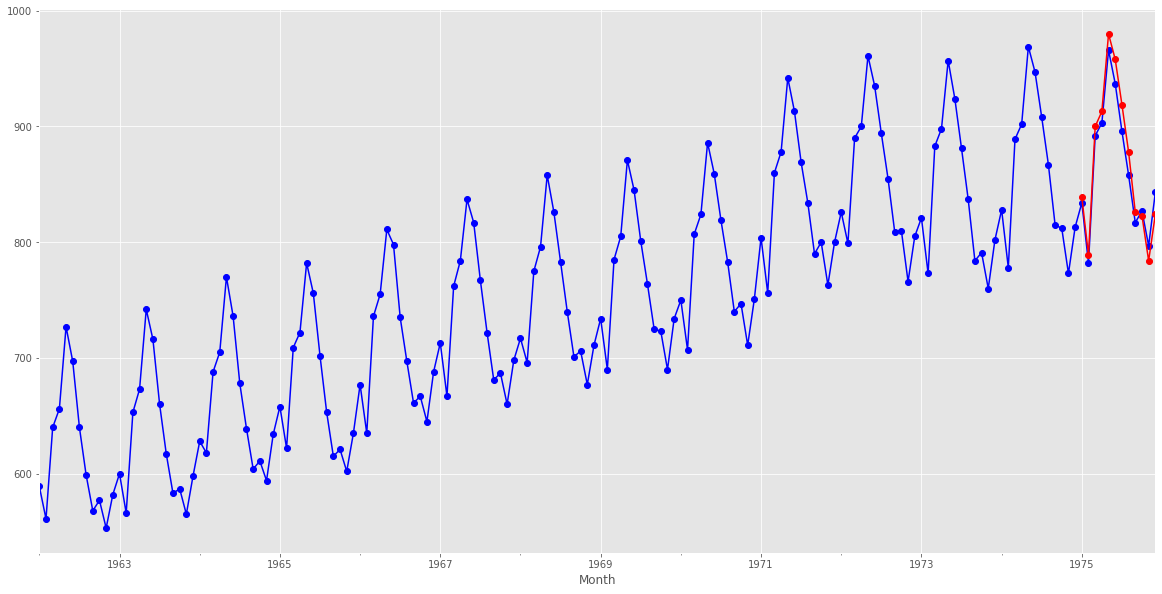

In [114]:
plt.figure(figsize = (20, 10))
df.loc[:,"pounds per cow"].plot(color = 'b', marker = 'o')

df.loc["1975-01-01":,'pred'].plot(color = 'r', marker = 'o')

In [136]:
mean_squared_error(df.loc['1975-01-01' : , "pounds per cow"],df.loc['1975-01-01' : , "pred"])

202.5833333333318

In [122]:
df

,pounds per cow,shift,1st diff
Month,,,
1962-01-01,589.0,NaN,NaN
1962-02-01,561.0,589.0,-28.0
1962-03-01,640.0,561.0,79.0
1962-04-01,656.0,640.0,16.0
1962-05-01,727.0,656.0,71.0
...,...,...,...
1975-08-01,858.0,896.0,-38.0
1975-09-01,817.0,858.0,-41.0
1975-10-01,827.0,817.0,10.0
